# RDKit Overview
[Open in Colab](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/RDKit/RDKit-general.ipynb)

In order to use chemistry as a tool in drug design, molecular screening, predictive modeling, and to implement machine learning algorithms using molecular architecture as input, among other applications, we need a tool that can translate molecular features into code to manipulate the chemical information. This is where RDKit comes into play. RDKit is an open-source collection of software tools designed for cheminformatics, computational biology, and computational chemistry. It provides functionalities for molecular modeling, visualization, and cheminformatics.

### Features:
1. <u>Molecular Modeling and Visualization:</u> Allows users to create, edit, and visualize molecular structures.
2. <u>Substructure Searching:</u> It can identify molecules that contain a particular structural fragment.
3. <u>Descriptors and Fingerprints:</u> Provides tools for computing molecular descriptors and fingerprints.
4. <u>Machine Learning Integration:</u> Integrate with popular machine learning libraries, enabling predictive modeling.

Here is the webpage with the full documentation: https://www.rdkit.org/

## Installation in Google Colab

In [1]:
!pip install rdkit-pypi

In [2]:
!pip install mols2grid #to visualize in a grid

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools
import mols2grid

from rdkit.Chem import Descriptors, PandasTools, AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Descriptors import MolWt, NumRotatableBonds
from rdkit.Chem.Crippen import MolLogP

### RDKit Modules and Functions:

1. **Chem**: The core module of RDKit, used for creating and manipulating molecular structures.
2. **DataStructs**: Provides functionalities for handling molecular fingerprints and calculating similarities.
3. **IPythonConsole**: Enables molecule visualization directly in Jupyter notebooks.
4. **MolsToGridImage**: A function to display multiple molecules in a grid format.
5. **Draw**: Contains functions for drawing and visualizing molecules.
6. **rdDepictor**: Contains functions related to molecule depiction.
7. **PandasTools**: Provides functionalities to integrate RDKit with pandas, such as adding molecule columns to DataFrames.
8. **Descriptors**: Contains various molecular descriptor calculation functions.
9. **MoleculeDescriptors**: Used for calculating a set of descriptors for molecules.
10. **AllChem**: A module that contains a variety of cheminformatics tools, including functions for generating fingerprints.

### Configuration:

- `IPythonConsole.ipython_useSVG = True`: Configures RDKit to use SVG (Scalable Vector Graphics) for rendering molecules in Jupyter notebooks, providing clearer images.
- `rdDepictor.SetPreferCoordGen(True)`: Sets the preferred coordinate generation method for molecule depiction.

### Additional Libraries:

- **mols2grid**: A library for displaying molecules in a grid format.


## Representing Molecules

- Representing molecules as strings is done with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule in a simple and concise text format. It is a linear notation, which means that it represents molecules as a sequence of characters, including letters and numbers, to describe the arrangement of atoms and bonds within the molecule.
- In SMILES notation, atoms are represented by their chemical symbols (e.g., "C" for carbon, "H" for hydrogen, "O" for oxygen) and connected by bond symbols (e.g., "-" for a single bond, "=" for a double bond, "#" for a triple bond). Additionally, parentheses and numbers are used to indicate branching and repeating structures within the molecule.

To represent molecules, we need to transform it from molecular respresentantion into SMILES by calling the `Chem.MolFromSmiles`

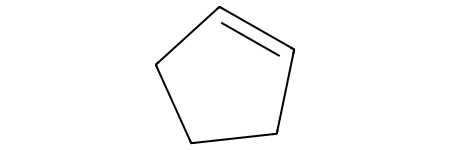

In [4]:
# Create a molecule object from SMILES notation.
mol = Chem.MolFromSmiles("C1CCC=C1")
mol

From here, we can ask for the number of atoms.

In [5]:
num_atoms = mol.GetNumAtoms()
num_atoms

5

And the atoms within the molecular struture.

In [6]:
atoms = [atom for atom in mol.GetAtoms()]
atom_symbols = [atom.GetSymbol() for atom in atoms]
atom_symbols

['C', 'C', 'C', 'C', 'C']

And the atomic number.

In [7]:
for idx, atom in enumerate(atoms):
  print(f"Atom {idx + 1} has atomic number of {atom.GetAtomicNum()}")

print()

Atom 1 has atomic number of 6
Atom 2 has atomic number of 6
Atom 3 has atomic number of 6
Atom 4 has atomic number of 6
Atom 5 has atomic number of 6



We can also retieve the bond between the atoms and the type.

In [8]:
bonds = mol.GetBonds()

for bond in bonds:
    begin_atom_idx = bond.GetBeginAtomIdx()
    end_atom_idx = bond.GetEndAtomIdx()
    bond_type = bond.GetBondType()

    print(f"Bond between atom {begin_atom_idx} and atom {end_atom_idx}, Bond type: {bond_type}")

Bond between atom 0 and atom 1, Bond type: SINGLE
Bond between atom 1 and atom 2, Bond type: SINGLE
Bond between atom 2 and atom 3, Bond type: SINGLE
Bond between atom 3 and atom 4, Bond type: DOUBLE
Bond between atom 4 and atom 0, Bond type: SINGLE


We can also add the atom indices.

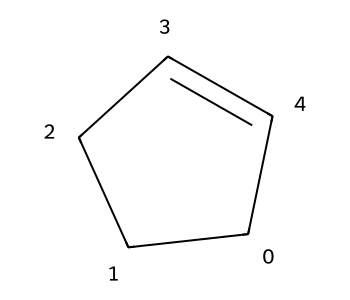

In [9]:
opts = Draw.MolDrawOptions()
opts.addAtomIndices = True
Draw.MolToImage(mol,size=(350,300),options=opts)

Triple bonds are represented by #

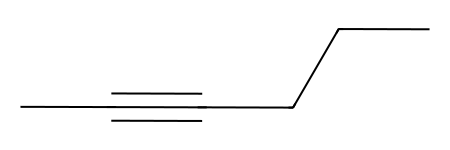

In [10]:
mol2 = Chem.MolFromSmiles('CCCC#CC')
mol2

SMILES notation doesn't include explicit "H" atoms, hydrogens are usually implicit. SMILES notation often omits hydrogen atoms on carbon and some other elements unless they are explicitly specified.

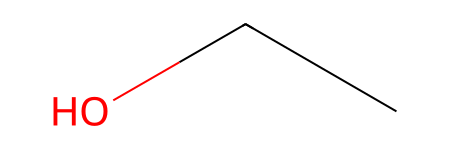

In [11]:
mol3 = Chem.MolFromSmiles("CCO")
mol3

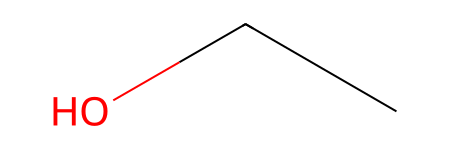

In [12]:
mol3 = Chem.MolFromSmiles("CCO[H]")
mol3

We can implicitly represent the H atom associated to a heavy atom by adding them with square brakets: [H]

To add charges, we'll have to do it by adding "+" or "-" in square brackets besides de atom type.

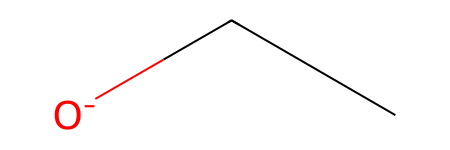

In [13]:
mol4 = Chem.MolFromSmiles("CC[O-]")
mol4

We can also have disconnected molecules within the same representation, like adding salts for example. We need to separe the molecules with a . between them.

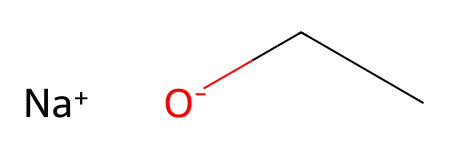

In [14]:
mol5 = Chem.MolFromSmiles("CC[O-].[Na+]")
mol5

The branching in SMILES is represented by adding the atom between parenthesis.

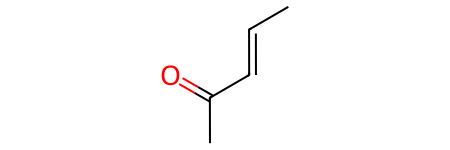

In [15]:
mol6 = Chem.MolFromSmiles("CC=CC(=O)C")
mol6

Rings, as we saw before, are represented by numbering the atoms that are connected. I fused ring systems, a single atom can have ring connections.

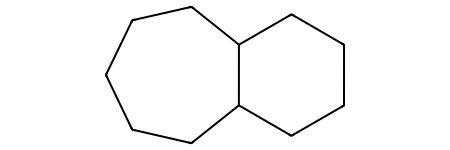

In [16]:
mol7 = Chem.MolFromSmiles('C12CCCCC1CCCCC2')
mol7

We can use the same atom closing the ring, to indicate the closure of another ring.

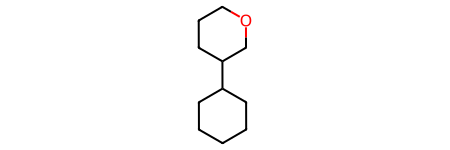

In [17]:
mol8 = Chem.MolFromSmiles('C1CCCCC1C1CCCOC1')
mol8

Aromatics are represented by the lower case in SMILES notation. If, an heteroatom within the ring has hydrogen attached, we need to specify it.

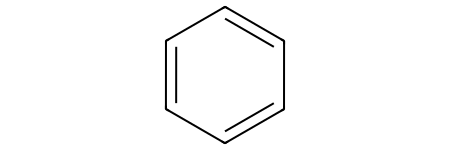

In [18]:
mol9 = Chem.MolFromSmiles('c1ccccc1')
mol9

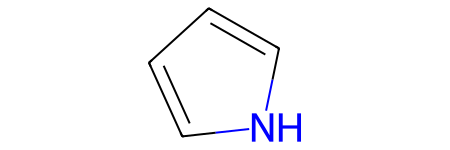

In [19]:
mol10 = Chem.MolFromSmiles('c1c[nH]cc1')
mol10

Sterochemistry is inticated with @ for clockwise and @@ for anticlockwise and the atom should go between square brackets.

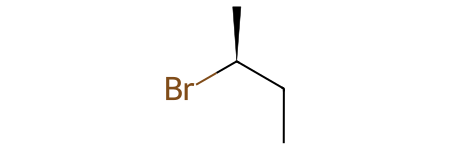

In [20]:
mol11 = Chem.MolFromSmiles('CC[C@H](C)(Br)')
mol11

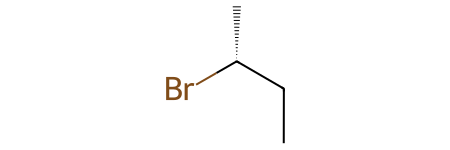

In [21]:
mol12 = Chem.MolFromSmiles('CC[C@@H](C)(Br)')
mol12

Finally, the isomerism of double bonds is specify by '/' and '\\'
-

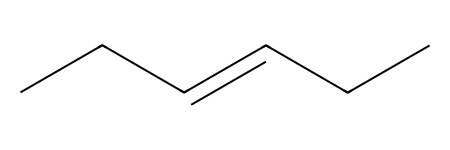

In [22]:
mol13 = Chem.MolFromSmiles('CC/C=C/CC')
mol13

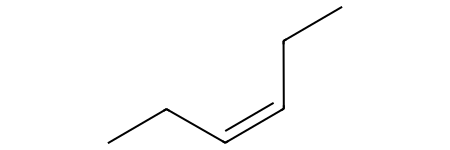

In [23]:
mol14 = Chem.MolFromSmiles('CC/C=C\CC')
mol14

Now, we can put all our molecules into a list to continue working with them.

In [24]:
smiles = ['C1CCC=C1', 'CCCC#CC', 'CCO', 'CC[O-]', 'CC[O-].[Na+]', 'CC=CC(=O)C',
          'C12CCCCC1CCCCC2', 'C1CCCCC1C1CCCOC1', 'c1ccccc1', 'c1c[nH]cc1',
          'CC[C@H](C)(Br)', 'CC[C@@H](C)(Br)', 'CC/C=C/CC', 'CC/C=C\CC']

In [25]:
mol_list = [Chem.MolFromSmiles(element) for element in smiles]
mol_list

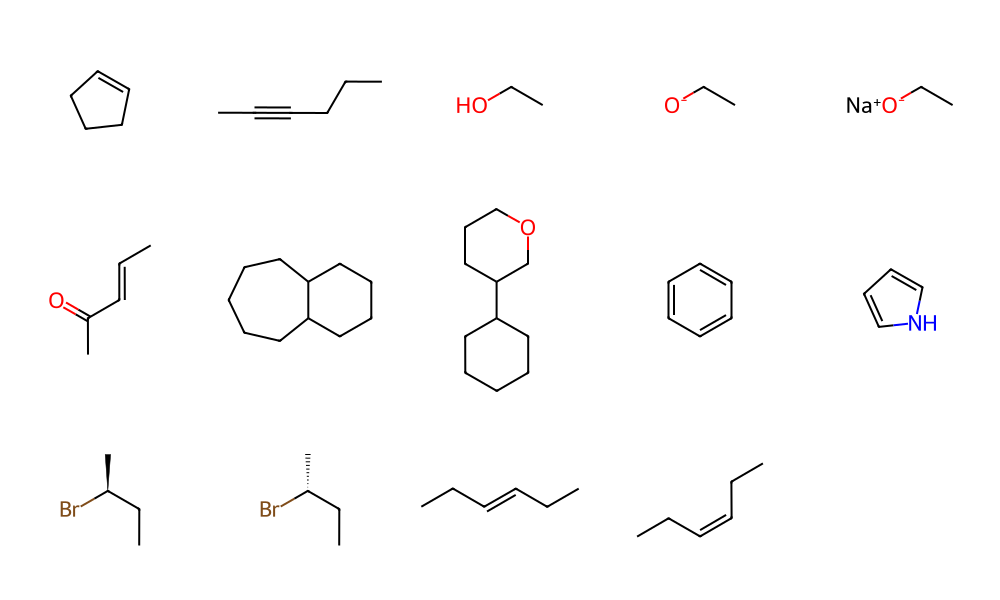

In [26]:
Draw.MolsToGridImage(mol_list,molsPerRow=5,useSVG=True)

We can create a DataFrame based on the SMILES of your molecules which is very convenient.

In [27]:
mol_df = pd.DataFrame(smiles, columns=['SMILES'])
mol_df.head()

,SMILES
0,C1CCC=C1
1,CCCC#CC
2,CCO
3,CC[O-]
4,CC[O-].[Na+]


And add the molecular representation from the SMILES.

In [28]:
mol_df_copy = mol_df.copy()
PandasTools.AddMoleculeColumnToFrame(mol_df_copy,smilesCol="SMILES")
mol_df

,SMILES
0,C1CCC=C1
1,CCCC#CC
2,CCO
3,CC[O-]
4,CC[O-].[Na+]
5,CC=CC(=O)C
6,C12CCCCC1CCCCC2
7,C1CCCCC1C1CCCOC1
8,c1ccccc1
9,c1c[nH]cc1


Or, we can display the molecules directly into a grid using a DataFrame.

In [29]:
# Creat a DataFrame from the mol_list
df_mol_list = pd.DataFrame(mol_list, columns=['Molecule'])

In [30]:
# Visualize the DataFrame of the molecules within a grid
mols2grid.display(df_mol_list,mol_col="Molecule")

MolGridWidget()

## Canonical Smiles

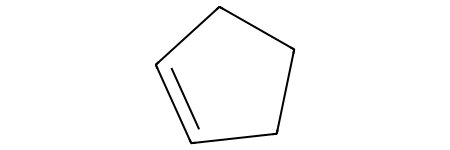

In [31]:
# Example
mol1 = Chem.MolFromSmiles('C1C=CCC1')
mol1

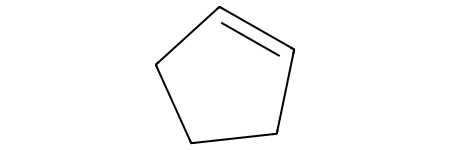

In [32]:
mol2 = Chem.MolFromSmiles('C1CCC=C1')
mol2

In [33]:
are_identical = mol1 == mol2
are_identical

False

There are several ways to represent one molecule using the SMILES notation. This can be a problem if we want to identify unique molecules. In order to avoid this, we need to get the canonical SMILES.

In [34]:
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] # Chem.MolFromSmiles Convert a SMILES to an RDKit molecule object
    smiles = [Chem.MolToSmiles(mol) for mol in mols] # Chem.MolToSmiles converts the molecule back into its canonical SMILES representation
    return smiles

In [35]:
mol1 = canonical_smiles(['C1C=CCC1'])
mol1

['C1=CCCC1']

In [36]:
mol2 = canonical_smiles(['C1CCC=C1'])
mol2

['C1=CCCC1']

In [37]:
are_identical = mol1 == mol2
are_identical

True

# Example from DataSet of Solubility Study

## Load Data

This dataset was taken from a publication about the solubility prediction. Here is the link: https://doi.org/10.1021/ci034243x

In [38]:
url = 'https://raw.githubusercontent.com/Stef0916/chemoinformatics-bioinformatics/main/solubility_prediction-2005/data/solubility_train_molecules.csv'
dataset = pd.read_csv(url)
dataset.shape

(1144, 4)

In [39]:
dataset.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


Let's set the canonical SMILES to the dataset

In [40]:
# Canonical SMILES
canon_smiles = canonical_smiles(dataset['SMILES'])

In [41]:
# Put the smiles in the dataframe
dataset['SMILES'] = canon_smiles
dataset

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)OC
1140,Vinclozolin,-4.925,-4.377,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O


## Data Pre-processing

Let's check for **missing values**, **duplicates** and **fragments**

**Remove Missing Values**

In [42]:
dataset["SMILES"].isnull().sum()

0

**Remove Duplicates**

In [43]:
duplicated = dataset[dataset['SMILES'].duplicated()]['SMILES'].values
duplicated

array(['Clc1ccc(-c2cccc(Cl)c2Cl)cc1', 'Clc1ccc(-c2cc(Cl)ccc2Cl)cc1',
       'Clc1ccc(-c2ccccc2Cl)cc1', 'Brc1ccc2ccccc2c1', 'CCC(C)CCO',
       'CCC1(CCC(C)C)C(=O)NC(=O)NC1=O', 'Cc1ccc(NC(=O)N(C)C)cc1Cl',
       'CCOP(=S)(OCC)SC(CCl)N1C(=O)c2ccccc2C1=O',
       'ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl',
       'CC12CCC3C(CCC4CC(O)CCC43C)C1CCC2=O',
       'CCOC1Oc2ccc(OS(C)(=O)=O)cc2C1(C)C', 'CCOC(=O)c1ccc(N)cc1',
       'CC12CCC(CC1)C(C)(C)O2', 'CN(C)C(=O)Nc1cccc(C(F)(F)F)c1',
       'OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(O)C(O)C1O',
       'Cc1ncc([N+](=O)[O-])n1CCO',
       'CCN(CC)c1c([N+](=O)[O-])cc(C(F)(F)F)c(N)c1[N+](=O)[O-]',
       'COc1ccccc1O', 'Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)Cl)cc1',
       'ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1', 'Nc1ccc(-c2ccc(N)cc2)cc1',
       'CCC1(c2ccccc2)C(=O)NC(=O)NC1=O', 'CCC1(C(C)C)C(=O)NC(=O)NC1=O',
       'O=C1c2ccccc2Cc2ccccc2N1CCF', 'NC(=O)c1ccccc1O',
       'OCC(O)C(O)C(O)C(O)CO',
       'NS(=O)(=O)c1cc2c(cc1Cl)NC(C(Cl)Cl)NS2(=O)=O'], dtype=object)

In [44]:
dataset[dataset['SMILES'].isin(duplicated)].sort_values(by=['SMILES'])

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
192,2-Bromonapthalene,-4.400,-4.434,Brc1ccc2ccccc2c1
191,2-bromonaphthalene,-4.400,-4.434,Brc1ccc2ccccc2c1
55,"1,8-Cineole",-1.740,-2.579,CC12CCC(CC1)C(C)(C)O2
674,eucalyptol,-1.640,-2.579,CC12CCC(CC1)C(C)(C)O2
392,Androsterone,-4.402,-3.882,CC12CCC3C(CCC4CC(O)CCC43C)C1CCC2=O
629,Epiandrosterone,-4.160,-3.882,CC12CCC3C(CCC4CC(O)CCC43C)C1CCC2=O
288,3-Methyl-2-pentanol,-0.720,-1.381,CCC(C)CCO
289,3-Methyl-2-pentanol,-0.710,-1.308,CCC(C)CCO
338,5-Ethyl-5-isopropylbarbituric acid,-2.148,-1.603,CCC1(C(C)C)C(=O)NC(=O)NC1=O
981,probarbital,-2.210,-1.603,CCC1(C(C)C)C(=O)NC(=O)NC1=O


In [45]:
dataset.shape

(1144, 4)

In [46]:
dataset_no_dup = dataset.drop_duplicates(subset=['SMILES'], keep='first').copy()

In [47]:
dataset_no_dup.shape

(1117, 4)

In [48]:
dataset_no_dup

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)OC
1140,Vinclozolin,-4.925,-4.377,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O


In [49]:
dataset_no_dup.reset_index(drop=True, inplace=True)

In [50]:
dataset_no_dup

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1112,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)OC
1113,Vinclozolin,-4.925,-4.377,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O
1114,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O
1115,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O


**Remove Fragments**

In some cases, a single SMILES string can represent multiple disconnected chemical structures. These disconnected structures are separated by a period (.) in the SMILES notation.

In [51]:
len(str(dataset_no_dup['SMILES']).split('.'))

4

In [52]:
def get_longest_smiles(smiles_string):
    return max(str(smiles_string).split('.'), key=len)

# Modify the 'SMILES' column with the longest SMILES strings using .loc[]
dataset_no_dup.loc[:, 'SMILES'] = dataset_no_dup['SMILES'].apply(get_longest_smiles)

# Create a new DataFrame without modifying the original df5:
dataset_clean = dataset_no_dup.copy()

In [53]:
dataset_clean

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1112,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)OC
1113,Vinclozolin,-4.925,-4.377,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O
1114,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O
1115,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O


## Visualization

### Draw from RDKit

RDKit function **Chem.MolFromSmiles** to covert a SMILES to a molecule object that can be depicted

In [54]:
mol_list = [Chem.MolFromSmiles(element) for element in dataset_clean['SMILES']]

In [55]:
len(mol_list)

1117

In [56]:
mol_list[:5]

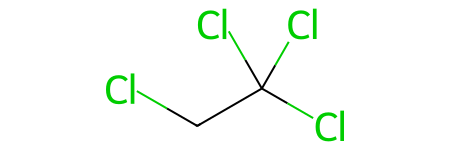

In [57]:
Chem.MolFromSmiles(dataset_clean['SMILES'].iloc[0])

### Create a DataFrame

In [58]:
# Creat a DataFrame from the mol_list
df_mol_list = pd.DataFrame(mol_list, columns=['Molecule'])

In [59]:
df_mol_list.head()

,Molecule
0,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38580>
1,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38cf0>
2,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38c80>
3,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38d60>
4,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38dd0>


In [60]:
# Visualize the DataFrame of the molecules within a grid
mols2grid.display(df_mol_list,mol_col="Molecule")

MolGridWidget()

## Descriptors

Molecular descriptors are numerical values or vectors that represent certain structural features or properties of molecules. RDKit provides a wide range of descriptors, including:

- Topological descriptors
- Geometrical descriptors
- Electronic descriptors
- Physicochemical descriptors

The Descriptors module has a list of the available descriptors. The list is made of 2-tuples (name, function):

In [61]:
# From https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html
print(len(Descriptors._descList))
print(Descriptors._descList[:5])

208
[('MaxEStateIndex', <function MaxEStateIndex at 0x790f5fdaf010>), ('MinEStateIndex', <function MinEStateIndex at 0x790f5fdaf0a0>), ('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x790f5fdaf130>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x790f5fdaf1c0>), ('qed', <function qed at 0x790f5fde2170>)]


#### 1. MW, LogP and RB descriptors<a name = 18></a>

**First Option**


---

Based on the mol_list we already created before.

In [62]:
mol_weights = [MolWt(mol) for mol in mol_list]
mol_weights[:5]

[167.85, 133.405, 167.85, 133.405, 187.37500000000003]

Let's add the MW in our DataFrame

In [63]:
df_mol_list['Molecular Weight'] = mol_weights

In [64]:
df_mol_list

,Molecule,Molecular Weight
0,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38580>,167.850
1,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38cf0>,133.405
2,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38c80>,167.850
3,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38d60>,133.405
4,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38dd0>,187.375
...,...,...
1112,<rdkit.Chem.rdchem.Mol object at 0x790f5fa893f0>,287.343
1113,<rdkit.Chem.rdchem.Mol object at 0x790f5fa89460>,286.114
1114,<rdkit.Chem.rdchem.Mol object at 0x790f5fa894d0>,308.333
1115,<rdkit.Chem.rdchem.Mol object at 0x790f5fa89540>,354.815


In [65]:
logp = [MolLogP(mol) for mol in mol_list]
logp[:5]

[2.5954000000000006, 2.376500000000001, 2.5938, 2.0289, 2.9189]

In [66]:
df_mol_list['LogP'] = logp

In [67]:
df_mol_list

,Molecule,Molecular Weight,LogP
0,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38580>,167.850,2.59540
1,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38cf0>,133.405,2.37650
2,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38c80>,167.850,2.59380
3,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38d60>,133.405,2.02890
4,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38dd0>,187.375,2.91890
...,...,...,...
1112,<rdkit.Chem.rdchem.Mol object at 0x790f5fa893f0>,287.343,1.98820
1113,<rdkit.Chem.rdchem.Mol object at 0x790f5fa89460>,286.114,3.42130
1114,<rdkit.Chem.rdchem.Mol object at 0x790f5fa894d0>,308.333,3.60960
1115,<rdkit.Chem.rdchem.Mol object at 0x790f5fa89540>,354.815,2.56214


In [68]:
num_rot_bonds = [NumRotatableBonds(mol) for mol in mol_list]
num_rot_bonds[:5]

[0, 0, 1, 1, 1]

In [69]:
df_mol_list['Number Rotatable Bonds'] = num_rot_bonds

In [70]:
df_mol_list.head()

,Molecule,Molecular Weight,LogP,Number Rotatable Bonds
0,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38580>,167.850,2.5954,0
1,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38cf0>,133.405,2.3765,0
2,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38c80>,167.850,2.5938,1
3,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38d60>,133.405,2.0289,1
4,<rdkit.Chem.rdchem.Mol object at 0x790f5fc38dd0>,187.375,2.9189,1


In [71]:
df_mol_list.shape

(1117, 4)

Now, we can add this descriptors to our grid visualization

In [72]:
# From https://github.com/PatWalters/practical_cheminformatics_tutorials/tree/main/fundamentals
two_decimals = lambda x: f"{x:.2f}"
mols2grid.display(df_mol_list,mol_col="Molecule",subset=["img","Molecular Weight","LogP","Number Rotatable Bonds"],transform={"Molecular Weight" : two_decimals, "LogP": two_decimals})

MolGridWidget()

**2. Second Option**


---


In [73]:
df_molecules = dataset_clean[['SMILES']]

In [74]:
df_molecules

,SMILES
0,ClCC(Cl)(Cl)Cl
1,CC(Cl)(Cl)Cl
2,ClC(Cl)C(Cl)Cl
3,ClCC(Cl)Cl
4,FC(F)(Cl)C(F)(Cl)Cl
...,...
1112,CNC(=O)C(C)SCCSP(=O)(OC)OC
1113,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O
1114,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O
1115,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O


,SMILES,ROMol
0,ClCC(Cl)(Cl)Cl,
1,CC(Cl)(Cl)Cl,
2,ClC(Cl)C(Cl)Cl,
3,ClCC(Cl)Cl,
4,FC(F)(Cl)C(F)(Cl)Cl,
...,...,...
1112,CNC(=O)C(C)SCCSP(=O)(OC)OC,
1113,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O,
1114,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,
1115,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O,

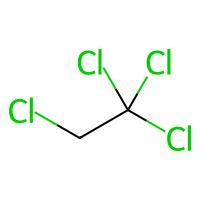
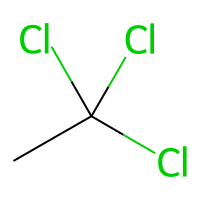
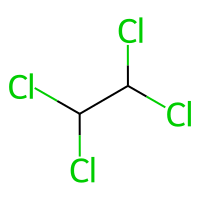
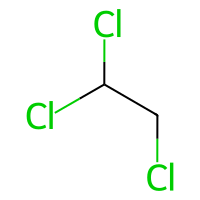
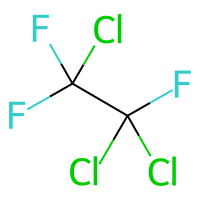
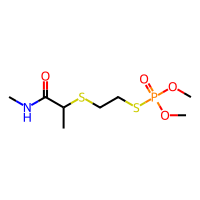
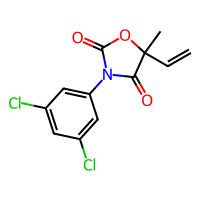
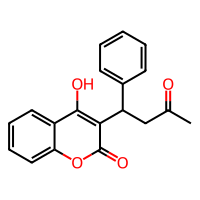
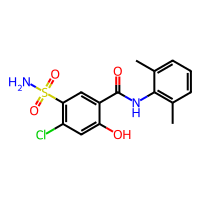
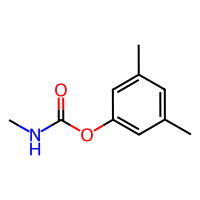

In [75]:
# using pandastools to create molecule from smiles within the dataframe
df_molecules = df_molecules.copy()
PandasTools.AddMoleculeColumnToFrame(df_molecules, smilesCol="SMILES")
df_molecules

In [76]:
def MW_LogP_RB_descriptors(smiles, verbose=False):
    """
    Calculate MW, LogP and RB's descriptors for a list of molecules.

    This function computes four of the Lipinski's rule of five descriptors
    for a given list of molecular structures provided in SMILES format:
    molecular weight (MW), LogP, and Number of Rotatable Bonds (RB).

    Parameters:
    - smiles (list of str): A list of molecular structures in SMILES format.
    - verbose (bool, optional): If True, will print out additional information
                                during processing. Defaults to False.

    Returns:
    - pd.DataFrame: A DataFrame containing the Lipinski descriptors for each molecule.
                    Columns are: "MW", "LogP" and "Number of Rotatable Bonds".

    # Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
    """

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_RB = NumRotatableBonds(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_RB])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","Number of Rotatable Bonds"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [77]:
df_MW_logP_RB = MW_LogP_RB_descriptors(df_molecules['SMILES'])
df_MW_logP_RB

,MW,LogP,Number of Rotatable Bonds
0,167.850,2.59540,0.0
1,133.405,2.37650,0.0
2,167.850,2.59380,1.0
3,133.405,2.02890,1.0
4,187.375,2.91890,1.0
...,...,...,...
1112,287.343,1.98820,8.0
1113,286.114,3.42130,2.0
1114,308.333,3.60960,4.0
1115,354.815,2.56214,3.0


In [78]:
df_MW_LogP_RB_descriptors = pd.concat([df_molecules, df_MW_logP_RB], axis=1)

In [79]:
df_MW_LogP_RB_descriptors

,SMILES,ROMol,MW,LogP,Number of Rotatable Bonds
0,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54970>,167.850,2.59540,0.0
1,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54890>,133.405,2.37650,0.0
2,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54ba0>,167.850,2.59380,1.0
3,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54190>,133.405,2.02890,1.0
4,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54a50>,187.375,2.91890,1.0
...,...,...,...,...,...
1112,CNC(=O)C(C)SCCSP(=O)(OC)OC,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03610>,287.343,1.98820,8.0
1113,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03680>,286.114,3.42130,2.0
1114,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb036f0>,308.333,3.60960,4.0
1115,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03760>,354.815,2.56214,3.0


#### 2. General Molecular Descriptors

In [80]:
# From https://github.com/gashawmg/molecular-descriptors
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] # From SMILES to RDKit
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol) #Because there are 3D descriptors like conformes that needs H atoms
        # Calculate all 208 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df_molecules['SMILES'])

In [81]:
df_with_208_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_208_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.619599,-2.293981,6.619599,2.047068,0.487138,167.850,165.834,165.891061,38,0,...,0,0,0,0,0,0,0,0,0,0
1,6.520833,-2.516204,6.520833,2.145833,0.445171,133.405,130.381,131.930033,32,0,...,0,0,0,0,0,0,0,0,0,0
2,6.662809,-2.170525,6.662809,2.170525,0.527312,167.850,165.834,165.891061,38,0,...,0,0,0,0,0,0,0,0,0,0
3,6.607253,-2.392747,6.607253,2.269290,0.480258,133.405,130.381,131.930033,32,0,...,0,0,0,0,0,0,0,0,0,0
4,11.544753,-4.226080,11.544753,3.685957,0.553756,187.375,187.375,185.901768,50,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,12.687881,-5.616797,12.687881,0.890341,0.543859,287.343,269.199,287.041487,96,0,...,1,0,0,0,0,0,0,0,0,0
1113,12.842429,-3.479900,12.842429,0.008218,0.782457,286.114,277.042,284.995949,94,0,...,0,0,0,0,0,0,0,0,0,0
1114,13.296487,-4.131891,13.296487,0.893522,0.747626,308.333,292.205,308.104859,116,0,...,0,0,0,0,0,0,0,0,0,0
1115,13.413918,-5.300258,13.413918,0.502258,0.786275,354.815,339.695,354.044106,122,0,...,0,1,0,0,0,0,0,0,0,0


In [82]:
df_RDKit_descriptors = pd.concat([df_molecules, df_with_208_descriptors], axis=1)

In [83]:
df_RDKit_descriptors

,SMILES,ROMol,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54970>,6.619599,-2.293981,6.619599,2.047068,0.487138,167.850,165.834,165.891061,...,0,0,0,0,0,0,0,0,0,0
1,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54890>,6.520833,-2.516204,6.520833,2.145833,0.445171,133.405,130.381,131.930033,...,0,0,0,0,0,0,0,0,0,0
2,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54ba0>,6.662809,-2.170525,6.662809,2.170525,0.527312,167.850,165.834,165.891061,...,0,0,0,0,0,0,0,0,0,0
3,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54190>,6.607253,-2.392747,6.607253,2.269290,0.480258,133.405,130.381,131.930033,...,0,0,0,0,0,0,0,0,0,0
4,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54a50>,11.544753,-4.226080,11.544753,3.685957,0.553756,187.375,187.375,185.901768,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,CNC(=O)C(C)SCCSP(=O)(OC)OC,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03610>,12.687881,-5.616797,12.687881,0.890341,0.543859,287.343,269.199,287.041487,...,1,0,0,0,0,0,0,0,0,0
1113,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03680>,12.842429,-3.479900,12.842429,0.008218,0.782457,286.114,277.042,284.995949,...,0,0,0,0,0,0,0,0,0,0
1114,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb036f0>,13.296487,-4.131891,13.296487,0.893522,0.747626,308.333,292.205,308.104859,...,0,0,0,0,0,0,0,0,0,0
1115,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03760>,13.413918,-5.300258,13.413918,0.502258,0.786275,354.815,339.695,354.044106,...,0,1,0,0,0,0,0,0,0,0


In [84]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule

        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

## Fingerprints

Molecular fingerprints are binary or count vectors that represent the presence (or frequency) of particular substructures or patterns in a molecule. They are crucial for tasks like similarity searching and clustering.

**Morgan Fingerprints**


---


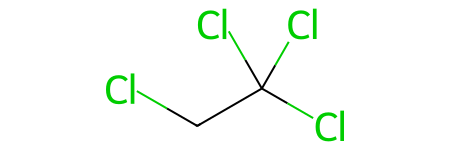

In [85]:
first_molecule = Chem.MolFromSmiles(dataset_clean.iloc[0]['SMILES'])
first_molecule

In [86]:
bi ={}

fp = AllChem.GetMorganFingerprintAsBitVect(first_molecule, 2, nBits=2048, bitInfo=bi)
fp_arr = np.zeros((0,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fp_arr

array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
np.nonzero(fp_arr) # = list(fp.GetOnBits())

(array([  80,  106,  114,  244,  803, 1109, 1130, 1683]),)

In [88]:
list(fp.GetOnBits())

[80, 106, 114, 244, 803, 1109, 1130, 1683]

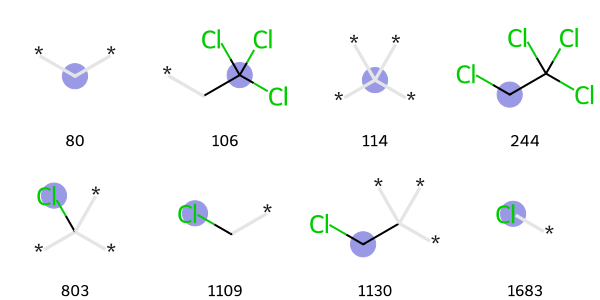

In [89]:
# From https://rdkit.blogspot.com/2018/10/using-new-fingerprint-bit-rendering-code.html
prints = [(first_molecule, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints,molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()])

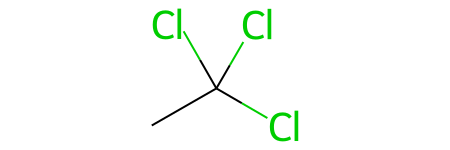

In [90]:
second_molecule = Chem.MolFromSmiles(dataset_clean.iloc[1]['SMILES'])
second_molecule

In [91]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(second_molecule, 2, nBits=2048, bitInfo=bi)
list(fp2.GetOnBits())

[114, 392, 803, 1039, 1057, 1683]

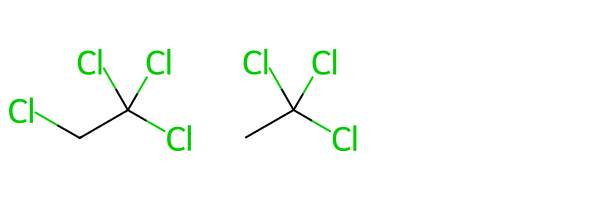

In [92]:
img = Draw.MolsToGridImage([first_molecule, second_molecule])
img

In [93]:
print('first_molecule', list(fp.GetOnBits()))
print('second_molecule', list(fp2.GetOnBits()))

first_molecule [80, 106, 114, 244, 803, 1109, 1130, 1683]
second_molecule [114, 392, 803, 1039, 1057, 1683]


In [94]:
DataStructs.TanimotoSimilarity(fp, fp2)

0.2727272727272727

The **Tanimoto similarity** is a measure used to compare the similarity between two sets. In cheminformatics, it's commonly used to compare molecular fingerprints.

So, let's generalize to our dataset.

In [95]:
# From https://github.com/gashawmg/molecular-descriptors
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)
    return np.array(Morgan_fpts)

In [96]:
morgan_fpts = morgan_fpts(df_molecules['SMILES'])
morgan_fpts.shape

(1117, 2048)

In [97]:
morgan_finpr = pd.DataFrame(morgan_fpts,columns=['Col_{}'.format(i) for i in range(morgan_fpts.shape[1])])
morgan_finpr

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1114,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
morgan_fingerprints = pd.concat([df_molecules, morgan_finpr], axis=1)

In [99]:
morgan_fingerprints

,SMILES,ROMol,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54970>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54890>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54ba0>,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54190>,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x790f5fb54a50>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,CNC(=O)C(C)SCCSP(=O)(OC)OC,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03610>,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,C=CC1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03680>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1114,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb036f0>,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,Cc1cccc(C)c1NC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1O,<rdkit.Chem.rdchem.Mol object at 0x790f5fb03760>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
